In [35]:
from typing import Optional
import folium
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse

sns.set(style="darkgrid")

In [19]:
def get_hist(values: pd.Series, title: str, xlabel: str, ylabel: str) -> None:
    fig, ax = plt.subplots()

    ax.hist(values)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [20]:
def get_countplot(values: pd.Series) -> None:
    fig, ax = plt.subplots(figsize=(25, 5))
    sns.countplot(x=values)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

In [21]:
def get_relplot(x: pd.Series | pd.Index, y: pd.Series | pd.Index, title: str, xlabel: str, ylabel: str, hue: Optional[pd.Series] = None) -> None:
    g = sns.relplot(x=x, y=y, hue=hue, kind='line')
    g.ax.set_xlabel(xlabel)
    g.ax.set_ylabel(ylabel)
    g.ax.set_title(title)

In [22]:
data = pd.read_csv('../datasets/nyc-taxi-trip-duration/train.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Data preprocessing

In [23]:
dataf = data.copy()
dataf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [24]:
dataf = dataf.drop(
    columns=['dropoff_datetime']
).astype(
    {'pickup_datetime': 'datetime64[ns]'}
)
dataf.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [25]:
dataf['log_trip_duration'] = np.log1p(dataf.trip_duration + 1)
dataf = dataf.drop(columns='trip_duration')
dataf.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.124683
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.499787
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661998
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.066108
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.079933


# Baseline with constant prediction

In [36]:
mse(dataf.log_trip_duration, np.full((len(dataf),), 6.5))

0.6288159322085206

# EDA

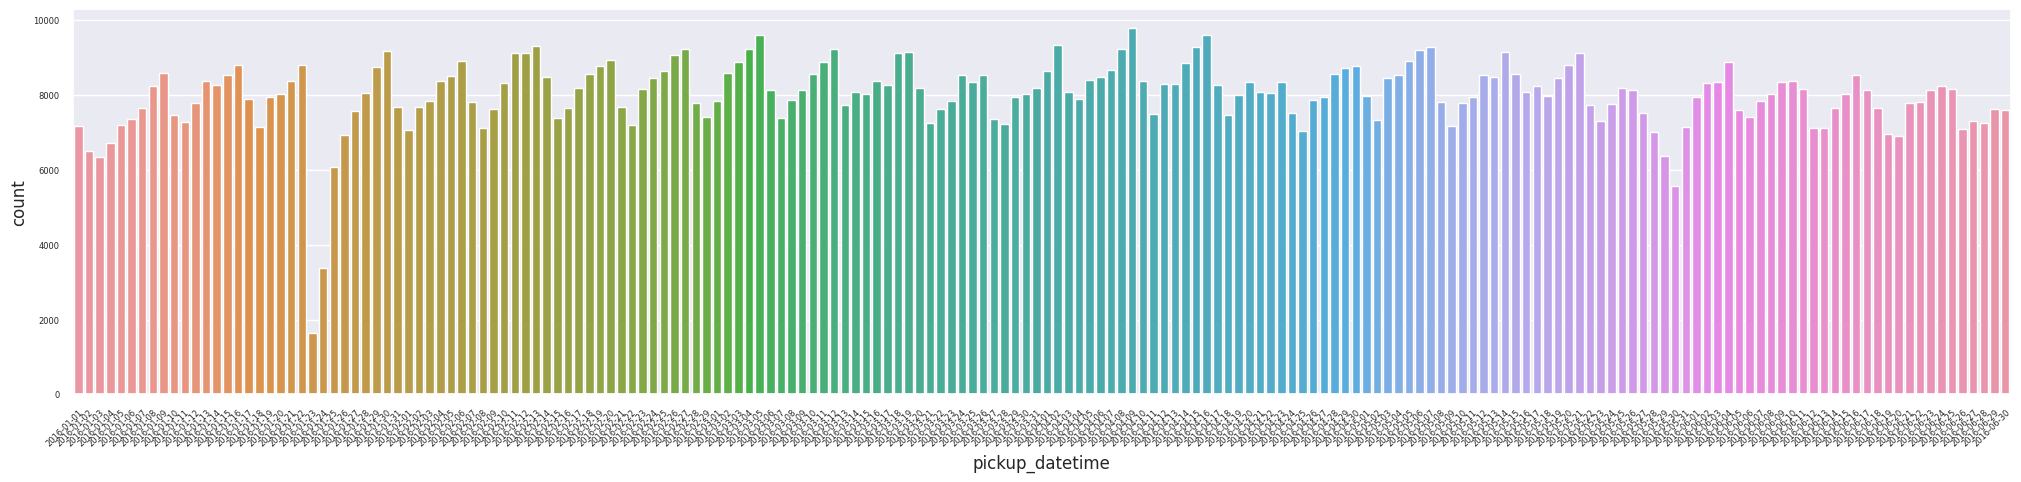

In [26]:
get_countplot(dataf.pickup_datetime.dt.date.sort_values())

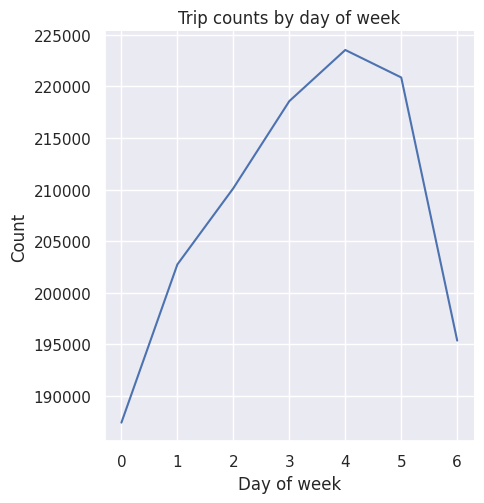

In [27]:
counts_day_of_week = dataf.pickup_datetime.dt.day_of_week.value_counts().sort_index()
get_relplot(counts_day_of_week.index, counts_day_of_week, 'Trip counts by day of week', 'Day of week', 'Count')

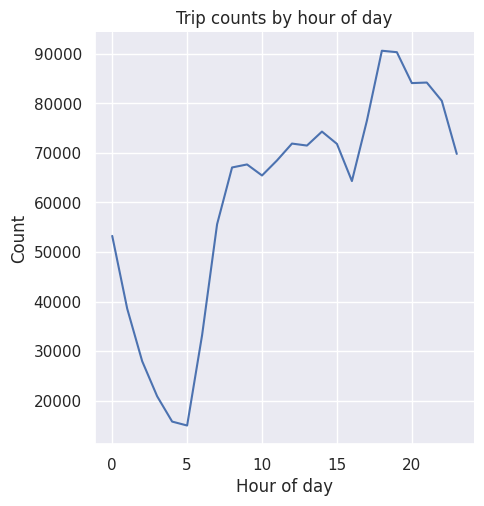

In [28]:
counts_hour_of_day = dataf.pickup_datetime.dt.hour.value_counts().sort_index()
get_relplot(counts_hour_of_day.index, counts_hour_of_day, 'Trip counts by hour of day', 'Hour of day', 'Count')

In [29]:
temp_data = dataf[['pickup_datetime', 'log_trip_duration']].copy()
temp_data['month'] = temp_data.pickup_datetime.dt.month
temp_data['hour'] = temp_data.pickup_datetime.dt.hour
temp_data['day_of_week'] = temp_data.pickup_datetime.dt.day_of_week
temp_data['day_of_year'] = temp_data.pickup_datetime.dt.day_of_year

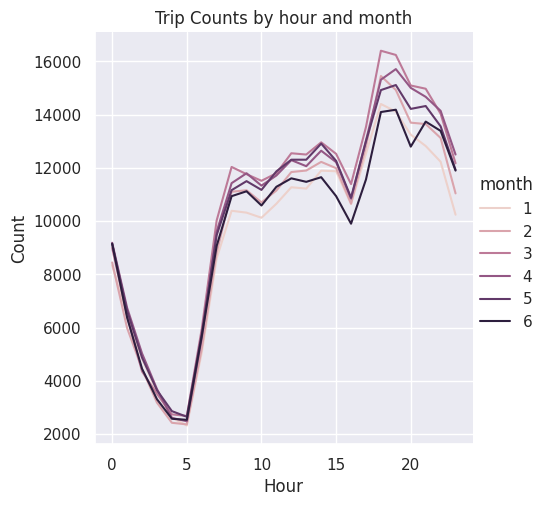

In [30]:
counts_hour_month = temp_data.groupby(['month', 'hour']).size().to_frame('trip_count').reset_index()
get_relplot(
    counts_hour_month.hour,
    counts_hour_month.trip_count,
    'Trip Counts by hour and month',
    'Hour',
    'Count',
    counts_hour_month.month
)

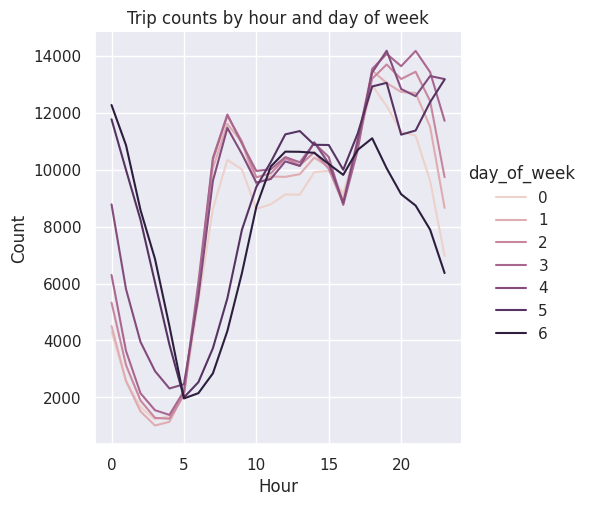

In [31]:
counts_hour_day = temp_data.groupby(['day_of_week', 'hour']).size().to_frame('trip_count').reset_index()
get_relplot(
    counts_hour_day.hour,
    counts_hour_day.trip_count,
    'Trip counts by hour and day of week',
    'Hour',
    'Count',
    counts_hour_day.day_of_week
)

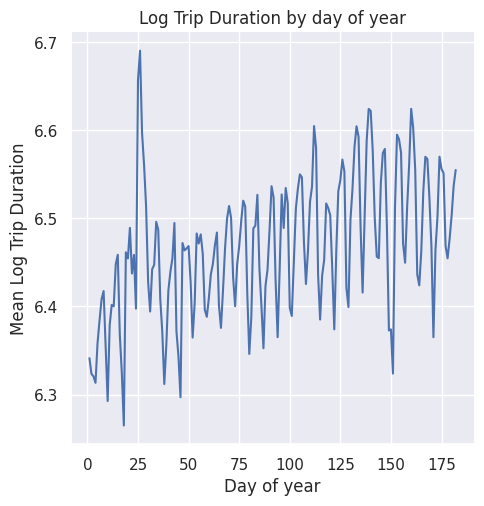

In [32]:
target_by_day_of_year = temp_data.groupby('day_of_year')['log_trip_duration'].mean()
get_relplot(
    target_by_day_of_year.index,
    target_by_day_of_year,
    'Log Trip Duration by day of year',
    'Day of year',
    'Mean Log Trip Duration'
)

In [34]:
dataf['day_of_week'] = dataf.pickup_datetime.dt.day_of_week
dataf['month'] = dataf.pickup_datetime.dt.month
dataf['hour'] = dataf.pickup_datetime.dt.hour
dataf['is_anomaly'] = np.where((dataf.pickup_datetime.astype('string') == '2016-01-23') | (dataf.pickup_datetime.astype('string') == '2016-05-30'), True, False)
dataf['day_of_year'] = dataf.pickup_datetime.dt.day_of_year

dataf.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour,is_anomaly,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.124683,0,3,17,False,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.499787,6,6,0,False,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661998,1,1,11,False,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.066108,2,4,19,False,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.079933,5,3,13,False,86
